# Question 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

(1207, 1207)


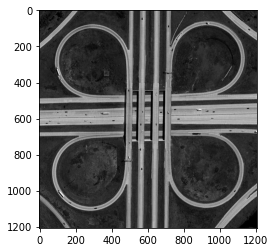

In [2]:
r = cv2.imread("../images/roads.jpg")
rRGB = cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
rG = cv2.cvtColor(r,cv2.COLOR_BGR2GRAY)
print(rG.shape)
plt.imshow(rG,cmap='gray')

In [3]:
def padding(pic,k):
    padNum = math.floor(k/2)
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    padPic[xStart:xEnd, yStart:yEnd] = pic
    return padPic

def dilate(img,k1,k2):
    k = max(k1,k2)
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k1,k2),dtype='uint8')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-k1//2:i+k1//2+1,j-k2//2:j+k2//2+1]
            vals = vals*StructE
            out[i,j] = np.max(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out


def erode(img,k1,k2):
    k = max(k1,k2)
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k1,k2),dtype='uint8')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-k1//2:i+k1//2+1,j-k2//2:j+k2//2+1]
            vals = vals*StructE
            out[i,j] = np.min(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out

def gausFilter(img,s,q):
    k = math.floor(q/2)
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (s ** 2)
    kern = np.zeros([q,q])
    center = int(q/2)
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/s
    #For 3D
#     kern = np.dstack((kern,kern))
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kernCom = kern
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
    out = out[center:out.shape[0]-center,center:out.shape[1]-center]
    return out.astype('uint8')


def filt(img,ker):
    r = img.shape[0]
    c = img.shape[1]
    out = img.copy()
    xS = 1
    xE = img.shape[0] - 1
    yS = 1
    yE = img.shape[1] - 1
    for i in range(xS,xE):
        for j in range(yS,yE):
            KxS = i - 1
            KxE = i + 1
            KyS = j - 1
            KyE = j + 1
            imgK = img[KxS:KxE+1,KyS:KyE+1]
            present = 1
            for a in range(3):
                for b in range(3):
                    if ker[a,b] == -1:
                        continue
                    elif ker[a,b] != imgK[a,b]:
                        present = 0
            if present == 1:
                out[i,j] = 0
    return out


## <b>Part 3</b>

In [4]:
#Obtained from selecting seed of truck
truckP = np.array([[ 121.52645876 ,1014.91865421],
                        [ 374.47571024 , 572.25746411],
                        [ 103.90294534 , 335.89504879],
                        [ 780.85319623 , 142.03640114],
                        [ 892.81434033 , 552.56059617],
                        [ 872.08079513 , 684.21860821]])

trucks = truckP.astype('int')
print(trucks)

[[ 121 1014]
 [ 374  572]
 [ 103  335]
 [ 780  142]
 [ 892  552]
 [ 872  684]]


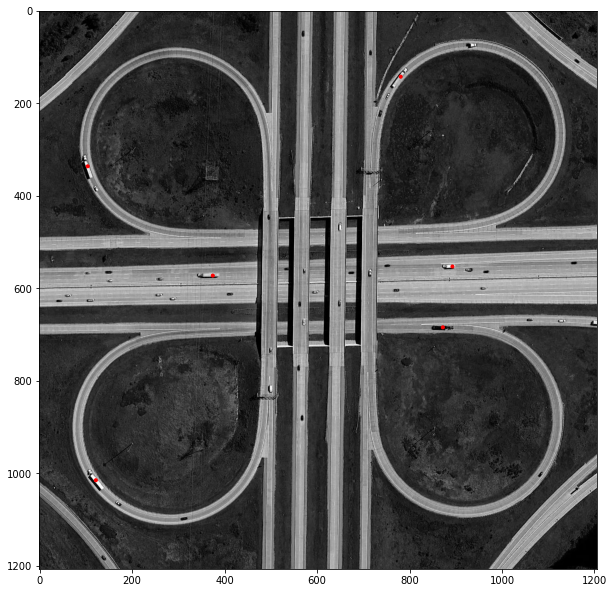

In [5]:
N = len(truckP)
fig = plt.figure(figsize=(10,15))

plotIt = plt.imshow(rG,cmap='gray')
# colors = np.random.rand(N)
area = (3* np.ones(N))**2 
plt.scatter(truckP[0:,0], truckP[0:,1], c='r', s=area)
plt.show()

In [6]:
# image_points = np.array([[ 121.52645876 ,1014.91865421],
#                         [ 374.47571024 , 572.25746411],
#                         [ 103.90294534 , 335.89504879],
#                         [ 780.85319623 , 142.03640114],
#                         [ 892.81434033 , 552.56059617],
#                         [ 872.08079513 , 684.21860821]])

In [7]:
grey = cv2.threshold(rG,175,255,cv2.THRESH_BINARY)[1]
grey3 = cv2.threshold(rG,70,255,cv2.THRESH_BINARY)[1]
grey3 = 255 - grey3
# plt.figure(figsize = (15,15))
# area = (2* np.ones(N))**2 
# plt.imshow(grey,cmap='gray')

In [8]:
grey1 = grey.copy()
grey1 = dilate(erode(grey1,3,3),3,3)

In [9]:
# plt.figure(figsize = (15,15))
# area = (2* np.ones(N))**2 
# plt.scatter(truckP[0:,0], truckP[0:,1], c='r', s=area)
# plt.imshow(grey1,cmap='gray')

In [10]:
def dfsIter(img,indexR,indexC,out,adjMatrix):
    moveAround = np.array([[-1,0],  #Top
                  [0,-1],           #Left
                  [1,0],            #Down
                  [0,1]])           #Right
    if indexR<0 or indexR>img.shape[0] or indexC<0 or indexC>img.shape[1]: 
        return
    if adjMatrix[indexR,indexC] == 1:
        return
    else: 
        adjMatrix[indexR,indexC] = 1
    if img[indexR,indexC] == 0:
        return
    out[indexR,indexC] = 255
    dfsIter(img,indexR+1,indexC,out,adjMatrix)
    dfsIter(img,indexR-1,indexC,out,adjMatrix)
    dfsIter(img,indexR,indexC+1,out,adjMatrix)
    dfsIter(img,indexR,indexC-1,out,adjMatrix)

In [11]:
print(trucks)

[[ 121 1014]
 [ 374  572]
 [ 103  335]
 [ 780  142]
 [ 892  552]
 [ 872  684]]


In [12]:
adjMatrix = np.zeros_like(grey1)
out = np.zeros_like(grey1)
for tru in range(trucks.shape[0]):
    if grey1[trucks[tru][1],trucks[tru][0]] == 255 and adjMatrix[trucks[tru][1],trucks[tru][0]] == 0:
        dfsIter(grey1,trucks[tru][1],trucks[tru][0],out,adjMatrix)

In [13]:
# plt.imshow(adjMatrix,cmap='gray')

In [14]:
grey2 = adjMatrix.copy()
grey2 = dilate(grey2,3,3)

In [15]:
# plt.figure(figsize = (9,9))
# plt.imshow(grey2,cmap='gray')

Other black truck

In [16]:

# plt.figure(figsize = (15,15))
# area = (2* np.ones(N))**2 
# plt.scatter(image_points[0:,0], image_points[0:,1], c='r', s=area)
# plt.imshow(255-grey3,cmap='gray')

In [17]:
adjMatrix3 = np.zeros_like(grey2)
out3 = np.zeros_like(grey3)
r,c = trucks[len(truckP)-1]
if grey3[c,r] == 255:
    if adjMatrix3[c,r]== 0:
        dfsIter(grey3,c,r,out3,adjMatrix3)

In [18]:
grey4 = grey3.copy()
grey4 = dilate(out3,3,3)
# plt.figure(figsize = (9,9))
# plt.imshow(grey4,cmap='gray')

In [19]:
truckSeg = np.zeros_like(grey2)
for i in range(truckSeg.shape[0]):
    for j in range(truckSeg.shape[1]):
        if grey2[i,j]!=0 or grey4[i,j]!=0:
            truckSeg[i,j] = 255

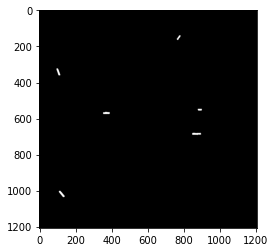

In [20]:
plt.imshow(truckSeg,cmap='gray')

In [21]:
print(truckSeg)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:

for i in range(rRGB.shape[0]):
    for j in range(rRGB.shape[1]):
        if truckSeg[i,j] == 255:
            rRGB[i,j,0] = 255
            rRGB[i,j,1] = 0
            rRGB[i,j,2] = 0

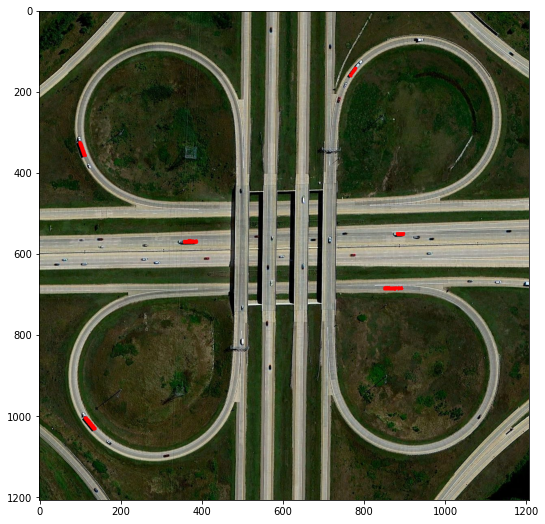

In [23]:
plt.figure(figsize = (9,9))
plt.imshow(rRGB)